All good posts start with a tweet. How about this one?

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">I invented this problem at breakfast and it&#39;s remarkably difficult: a mass m inside an equilateral triangle is connected by springs. Find out how it will move.<br>I failed: could not eliminate z (not even with mentioned relationship), nor found a good coordinate system. Tbc.. <a href="https://t.co/CmSgIOGVwP">pic.twitter.com/CmSgIOGVwP</a></p>&mdash; Maarten Mortier (@maartengm) <a href="https://twitter.com/maartengm/status/1526467163615289351?ref_src=twsrc%5Etfw">May 17, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

Let’s solve this using Python. First, some drawings:

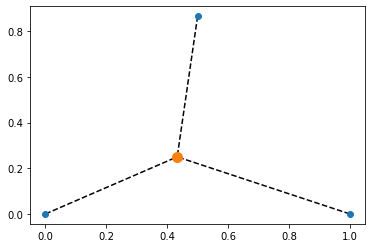

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

degree = np.pi / 180.
anchors = np.array([[0, 0],
                    [1, 0],
                    [np.cos(60 * degree), np.sin(60 * degree)]])

def draw_scene(x, y, ax):
    for anchor in anchors:
        ax.plot([anchor[0], x],
                [anchor[1], y], "--k")
    ax.plot(anchors[:, 0], anchors[:, 1], 'o')
    ax.plot(x, y, 'o', ms=10)
    
fig, ax = plt.subplots()
draw_scene(0.5 * np.cos(30 * degree), 0.5 * np.sin(30 * degree), ax)

Let’s now introduce the equations that time-step the mass that is subject to the spring forces.

In [2]:
def spring_force(start, stop, k, l0):
    AB = stop - start
    l = np.linalg.norm(AB)
    return -k * (l - l0) * AB / l

spring_force(np.array([0, 0]), np.array([1, 0]), 10, 0.5)

array([-5., -0.])

In [3]:
def step(x, xdot, ks, l0s, anchors, dt):
    force = np.zeros((2,))
    for start, k, l0 in zip(anchors, ks, l0s):
        force += spring_force(start, x, k, l0)
    xdot += force * dt
    x += xdot * dt
    return x, xdot

x = np.array([0.5 * np.cos(30 * degree), 0.5 * np.sin(30 * degree)])
xdot = np.array([0, 0.])
step(x, xdot, ks=[1, 2, 3], l0s=[2, 4, 6], anchors=anchors, dt=0.1)

(array([0.36669359, 0.12431156]), array([-0.66319116, -1.25688438]))

Let’s try some trajectories.

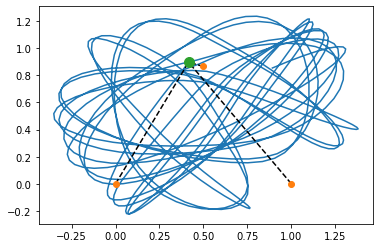

In [4]:
x = np.array([0.8, 0.8])
xdot = np.array([0.9, 0.6])
trajectory = []
for _ in range(700):
    x, xdot = step(x, xdot, ks=[1, 2, 3], l0s=[0.6, 0.8, 0.5], anchors=anchors, dt=0.1)
    trajectory.append(x.copy())
    
trajectory = np.array(trajectory)

fig, ax = plt.subplots()
ax.plot(trajectory[:, 0], trajectory[:, 1])
draw_scene(x[0], x[1], ax)

This looks good. Let’s make an animation.

In [5]:
from IPython.display import HTML
import matplotlib.animation as manim

fig, ax = plt.subplots()

def func(frame):
    ax.cla()
    ax.plot(trajectory[:int(frame), 0], trajectory[:int(frame), 1])
    draw_scene(trajectory[int(frame), 0], 
               trajectory[int(frame), 1], ax)
    
    
animation = manim.FuncAnimation(fig, func, frames=np.linspace(0, 700, 100, dtype=int, endpoint=False))

plt.close(fig)
HTML(animation.to_jshtml())

Finally, let’s search for some patterns.

Column
    [0] Column
        [0] FloatSlider(name='x', start=0.2, value=0.6000000000000001)
        [1] FloatSlider(name='y', start=0.2, value=0.6000000000000001)
        [2] FloatSlider(name='xdot', value=0.5)
        [3] FloatSlider(name='ydot', value=0.5)
        [4] FloatSlider(end=10.0, name='k', start=1.0, value=5.5)
        [5] FloatSlider(end=0.9, name='l0', start=0.1, value=0.5)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00101')
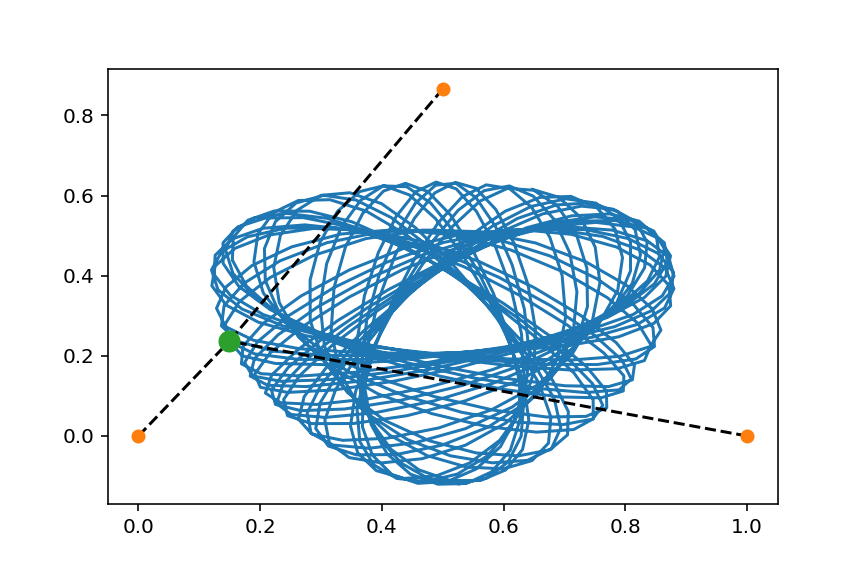

In [6]:
import panel as pn
pn.extension()

def make_trajectory(x, y, xdot, ydot, k, l0):
    x = np.array([x, y], dtype=float)
    xdot = np.array([xdot, ydot], dtype=float)
    ks = [k] * 3
    l0s = [l0] * 3
    trajectory = []
    for _ in range(700):
        x, xdot = step(x, xdot, ks, l0s, anchors=anchors, dt=0.1)
        trajectory.append(x.copy())
    trajectory = np.array(trajectory)

    fig, ax = plt.subplots()
    ax.plot(trajectory[:, 0], trajectory[:, 1])
    draw_scene(x[0], x[1], ax)
    plt.close(fig)
    return fig

i = pn.interact(make_trajectory, x=(0.2, 1.), y=(0.2, 1.), 
            xdot=(0., 1.), ydot=(0., 1.),
           k=(1., 10.), 
           l0=(0.1, 0.9))

i

Let’s end this post with another tweet, then:

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Solving your problem numerically gives pretty nice diagrams :) <a href="https://t.co/AyIj2P3a9U">pic.twitter.com/AyIj2P3a9U</a></p>&mdash; Florian Le Bourdais (@frolianlb) <a href="https://twitter.com/frolianlb/status/1526882194542698497?ref_src=twsrc%5Etfw">May 18, 2022</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 